In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
%matplotlib inline

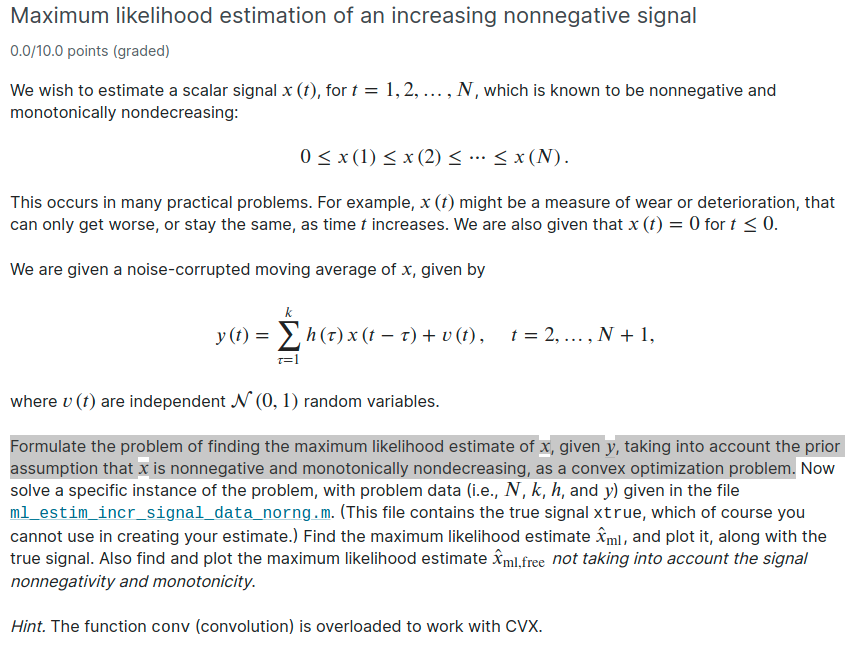

# ML Formulation


$v_i = y_i - (h*x)_i ,\quad i = 0, ..., n-1$

$P(Y=y|X=x) = P(V = v) = \prod P(V_i =  v_i) = \prod f_Z(v_i)$

log-likelihood =  
$log(P(Y=y|X=x)) = \sum log(f_Z(v_i)) = \sum [log(\frac{1}{2\pi} exp(\frac{-v_i^2}{2}))] = \sum [log(\frac{1}{2\pi}) +  \frac{-v_i^2}{2}] $

ML formulation:  

minimize $\lVert v \rVert ^ 2$  
s.t  
$v = y - (h*x)$  
$x \geq 0$  
$x_i \geq x_{i-1}, \quad i = 1,...,n-1$


# Problem data

In [2]:
np.random.seed(1)
N = 100

# create an increasing input signal
xtrue = np.zeros(N)
xtrue[0:40] = 0.1
xtrue[49] = 2
xtrue[69:80] = 0.15
xtrue[79] = 1
xtrue = np.cumsum(xtrue)

# pass the increasing input through a moving-average filter 
# and add Gaussian noise
h = np.array([1, -0.85, 0.7, -0.3])
k = h.size
yhat = np.convolve(h,xtrue)
noise = [-0.43,-1.7,0.13,0.29,-1.1,1.2,1.2,-0.038,0.33,0.17,-0.19,0.73,-0.59,2.2,-0.14,0.11,1.1,0.059,-0.096,-0.83,0.29,-1.3,0.71,1.6,-0.69,0.86,1.3,-1.6,-1.4,0.57,-0.4,0.69,0.82,0.71,1.3,0.67,1.2,-1.2,-0.02,-0.16,-1.6,0.26,-1.1,1.4,-0.81,0.53,0.22,-0.92,-2.2,-0.059,-1,0.61,0.51,1.7,0.59,-0.64,0.38,-1,-0.02,-0.048,4.3e-05,-0.32,1.1,-1.9,0.43,0.9,0.73,0.58,0.04,0.68,0.57,-0.26,-0.38,-0.3,-1.5,-0.23,0.12,0.31,1.4,-0.35,0.62,0.8,0.94,-0.99,0.21,0.24,-1,-0.74,1.1,-0.13,0.39,0.088,-0.64,-0.56,0.44,-0.95,0.78,0.57,-0.82,-0.27]
noise = np.array(noise).reshape(N,1)
y = yhat[0:-3].reshape(N,1) + noise

xtrue = np.asmatrix(xtrue.reshape(N,1))
y = np.asmatrix(y)

In [3]:
N,k,h,y.shape 

(100, 4, array([ 1.  , -0.85,  0.7 , -0.3 ]), (100, 1))

# Solving

In [4]:
x = cp.Variable((N,1))
v = y - cp.conv(h,x)[:-3]

obj = cp.Minimize(cp.sum_squares(v))

C1 = []
C2 = C1 + [x[0] >= 0, x[1:] >= x[:-1]]


prob = cp.Problem(obj, C1)
prob.solve()
assert prob.status == cp.OPTIMAL
print('optimal value (free):', prob.value)
x_free = x.value

prob = cp.Problem(obj, C2)
prob.solve()
assert prob.status == cp.OPTIMAL
print('optimal value (noneg + mono):', prob.value)
x_ml = x.value

optimal value (free): 9.602767219195726e-41
optimal value (noneg + mono): 58.99963475072767


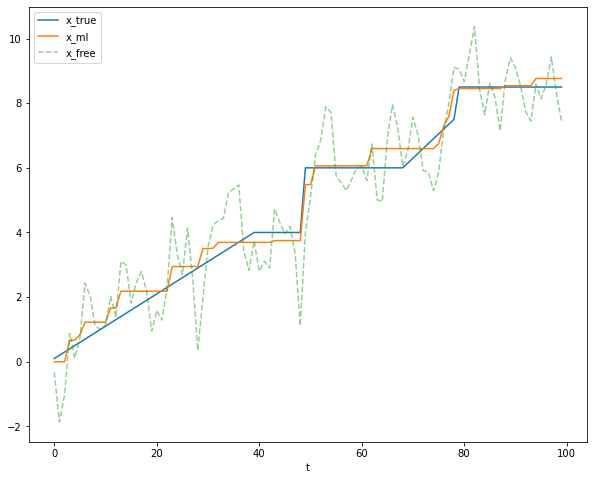

In [5]:
fig, ax = plt.subplots(figsize = (10,8))
prec = 10
ax.plot(xtrue, label = 'x_true')
ax.plot(x_ml.round(prec), label = 'x_ml')
ax.plot(x_free.round(prec), label = 'x_free', linestyle = '--', alpha = 0.5)
ax.set_xlabel('t')
plt.legend()
plt.show()


In [6]:
np.abs(xtrue - x_ml).max() , np.abs(xtrue - x_free).max()

(0.8972120389979317, 2.8849194234281113)